In [3]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Activation
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
import time

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [5]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation="relu"))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10, activation="softmax"))

optimizer=RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs = 10

In [6]:
batch_list = [32,64,128,256,512,1024]
batch_time = []
batch_accuracy = []
for each in batch_list:

  start = time.time()
  end = time.time()
  history = model.fit(x_train,y_train,batch_size=each,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
  end = time.time()
  batch_time.append(end-start)

  score= model.evaluate(x_test,y_test)
  batch_accuracy.append(score[1])

Epoch 1/10
1875/1875 [==============================] - 20s 6ms/step - loss: 0.1392 - accuracy: 0.9592 - val_loss: 0.0533 - val_accuracy: 0.9845
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0595 - accuracy: 0.9846 - val_loss: 0.0316 - val_accuracy: 0.9893
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0542 - accuracy: 0.9868 - val_loss: 0.0583 - val_accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0560 - accuracy: 0.9872 - val_loss: 0.0384 - val_accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0610 - accuracy: 0.9874 - val_loss: 0.0840 - val_accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0624 - accuracy: 0.9871 - val_loss: 0.0696 - val_accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0719 - accuracy: 0.9857 - val_loss: 0.0664 - val_ac

In [7]:
batch_time

[115.61755394935608,
 72.81848478317261,
 82.11800384521484,
 82.13711667060852,
 40.852280139923096,
 40.49720048904419]

In [8]:
batch_accuracy

[0.986299991607666,
 0.9897000193595886,
 0.986299991607666,
 0.9879000186920166,
 0.9914000034332275,
 0.9936000108718872]

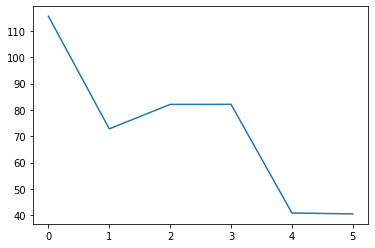

In [15]:
import matplotlib.pyplot as plt
plt.plot(batch_time)

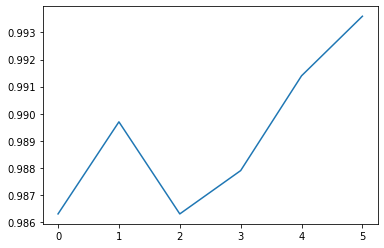

In [17]:
plt.plot(batch_accuracy)